In [1]:
import pandas as pd
import os
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
from astropy import units as u 
from astroquery.xmatch import XMatch
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('C:\\Users\\gamak\\Documents\\Papers\\Stars\\')

Could not import regions, which is required for some of the functionalities of this module.


In [2]:
PAN_raw = pd.read_csv('./NewIter/xPANdr2_raw.csv')

In [7]:
PAN_raw = PAN_raw[PAN_raw.gMeanPSFMag > 0]
PAN_raw = PAN_raw[PAN_raw.rMeanPSFMag > 0]

In [17]:
PAN_clean = PAN_raw.sort_values(['ng','nr'], ascending=False).drop_duplicates('source_id', ignore_index=True)

<AxesSubplot:>

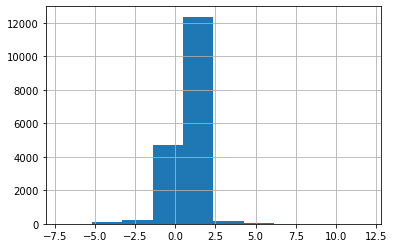

In [21]:
PAN_clean['g_r'] = PAN_clean.gMeanPSFMag - PAN_clean.rMeanPSFMag

In [22]:
xGAIA = pd.read_csv('gaia_xstars_pm_r98_200pc_lkh10_woutdup.gzip')

In [84]:
PAN_clean.columns

Index(['source_id', 'ra_2', 'dec_2', 'objID', 'raMean', 'decMean',
       'nDetections', 'ng', 'nr', 'ni', 'nz', 'ny', 'gMeanPSFMag',
       'rMeanPSFMag', 'iMeanPSFMag', 'zMeanPSFMag', 'yMeanPSFMag', 'g_r'],
      dtype='object')

In [85]:
PAN_clean = PAN_clean.drop(columns=['ra_2','dec_2'])
col_PAN = ['source_id','MG','gMeanPSFMag','rMeanPSFMag','iMeanPSFMag','zMeanPSFMag', 'yMeanPSFMag', 'g_r', 'Teff', 'dist_pc',
           'ra_2','dec_2']
xPAN = PAN_clean.merge(xGAIA, 'inner', 'source_id')[col_PAN]

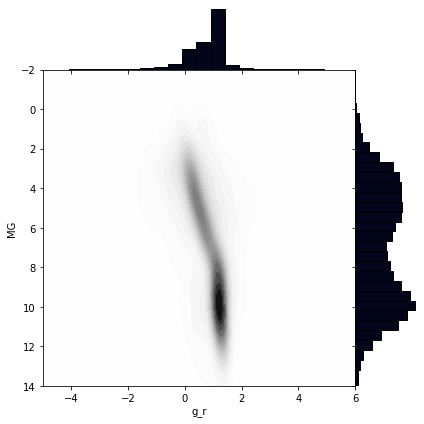

In [32]:
g = sns.JointGrid(data=xPAN, x="g_r", y="MG", space=0, xlim=(-5,6), ylim=(14,-2)) #
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=20, cmap="gray_r") #,  clip=((-.1, 4.1), (14, -2))
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, binwidth=0.5)

In [46]:
SDSS_raw = pd.read_csv('./NewIter/xSDSS9.csv')

<AxesSubplot:>

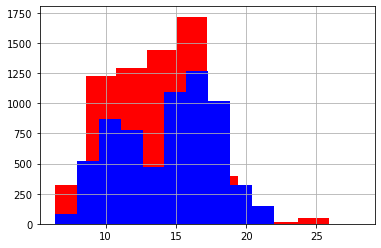

In [52]:
SDSS_raw.rmag.hist(color='red')
SDSS_raw.gmag.hist(color='blue')

In [35]:
SDSS_raw = SDSS_raw[SDSS_raw.gmag > 14.1]

In [80]:
SDSS_raw = SDSS_raw.drop(columns = 'MG')

In [81]:
col_SDSS = ['source_id','MG','gmag','rmag','imag','zmag', 'g_r', 'Teff', 'dist_pc','ra_2','dec']
xSDSS = SDSS_raw.merge(xGAIA, 'inner', 'source_id')[col_SDSS]

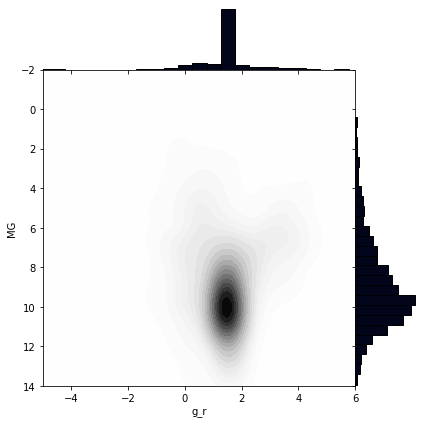

In [45]:
g = sns.JointGrid(data=xSDSS, x="g_r", y="MG", space=0, xlim=(-5,6), ylim=(14,-2)) #
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=20, cmap="gray_r") #,  clip=((-.1, 4.1), (14, -2))
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, binwidth=0.5)

In [90]:
xPAN['Teff_sdss'] = 1.09e4/(xPAN.g_r[xPAN.g_r > -.5]+1.47)
xSDSS['Teff_sdss'] = 1.09e4/(xSDSS.g_r[xSDSS.g_r > -.5]+1.47)

<AxesSubplot:>

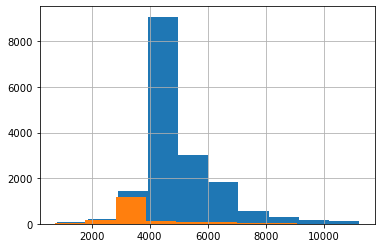

In [56]:
xPAN.Teff_sdss.hist()
xSDSS.Teff_sdss.hist()

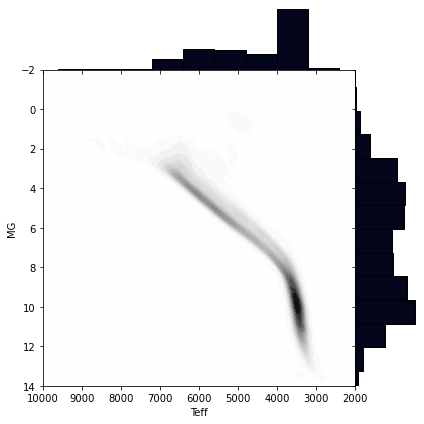

In [61]:
g = sns.JointGrid(data=xPAN, x="Teff", y="MG", space=0,  xlim=(10000,2000), ylim=(14,-2)) # 
g.plot_joint(sns.kdeplot, fill =True,
             thresh=0, levels=20, cmap="gray_r", bw_adjust = 0.4)
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=16)

<AxesSubplot:>

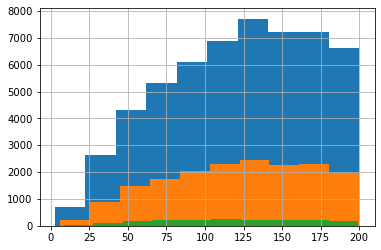

In [67]:
xGAIA.dist_pc.hist()
xPAN.dist_pc.hist()
xSDSS.dist_pc.hist()

<AxesSubplot:>

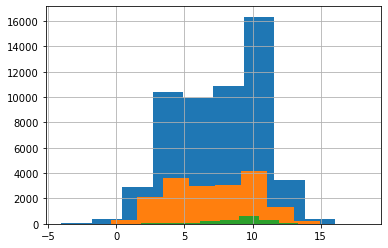

In [68]:
xGAIA.MG.hist()
xPAN.MG.hist()
xSDSS.MG.hist()

<AxesSubplot:>

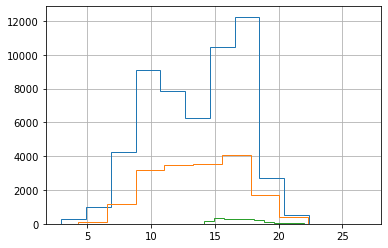

In [74]:
xGAIA.phot_bp_mean_mag.hist(histtype = 'step')# log=True
xPAN.gMeanPSFMag.hist(histtype = 'step')
xSDSS.gmag.hist(histtype = 'step')

<AxesSubplot:>

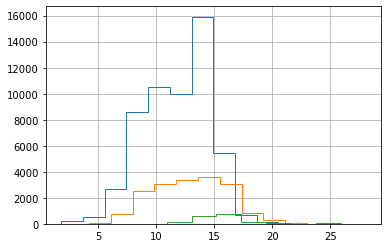

In [76]:
xGAIA.phot_rp_mean_mag.hist(histtype = 'step')
xPAN.rMeanPSFMag.hist(histtype = 'step')
xSDSS.rmag.hist(histtype = 'step')

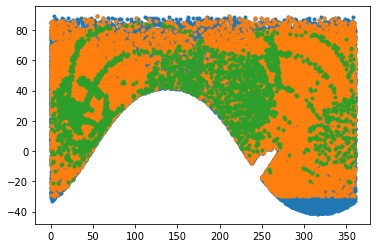

In [89]:
plt.plot(xGAIA.ra_2,xGAIA.dec,'.')
plt.plot(xPAN.ra_2,xPAN.dec_2,'.')
plt.plot(xSDSS.ra_2,xSDSS.dec,'.')

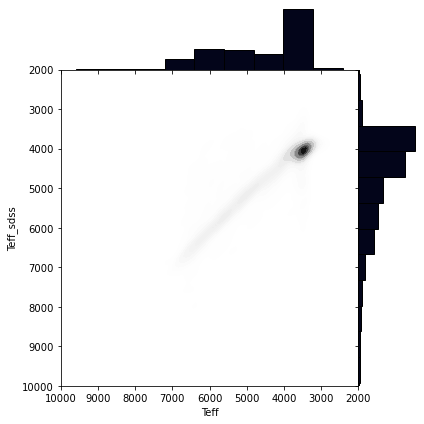

In [94]:
g = sns.JointGrid(data=xPAN, x="Teff", y="Teff_sdss", space=0,  xlim=(10000,2000), ylim=(10000,2000)) # 
g.plot_joint(sns.kdeplot, fill =True,
             thresh=0, levels=20, cmap="gray_r", bw_adjust = 0.4)
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=16)